Number of coins detected: 46


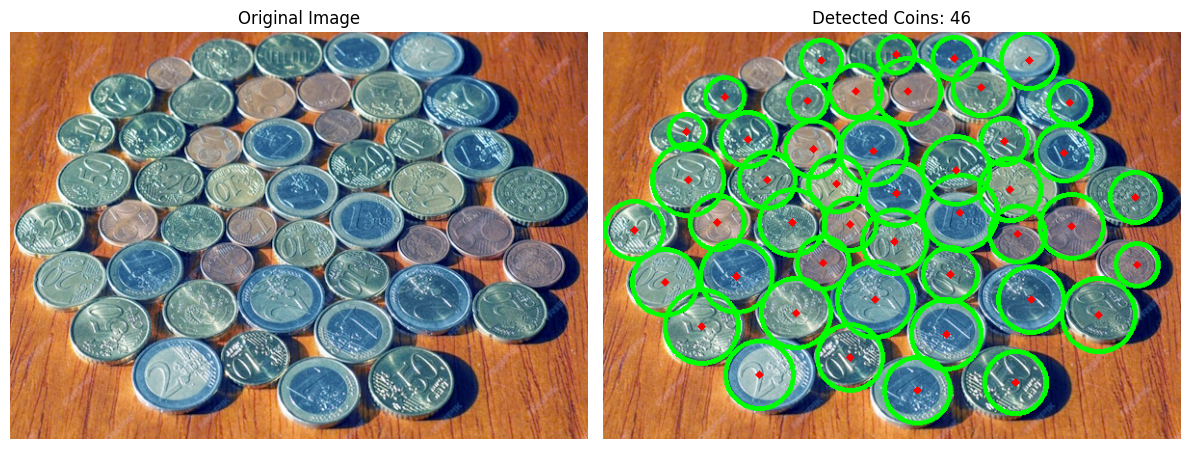

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('coins2.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_blurred = cv.GaussianBlur(img_gray, (5, 5), 5)


circles = cv.HoughCircles(
    img_gray_blurred, 
    cv.HOUGH_GRADIENT, 
    dp=1, 
    minDist=36,       
    param1=100,       
    param2=28,        
    minRadius=14,    
    maxRadius=40      
)

img_copy = img.copy()

if circles is not None:

    circles = np.uint16(np.around(circles))
    
    for detected_circle in circles[0]:
        x_coor, y_coor, detected_radius = detected_circle
        cv.circle(img_copy, (x_coor, y_coor), detected_radius, (0, 255, 0), 3) 
        cv.circle(img_copy, (x_coor, y_coor), 2, (0, 0, 255), 3)
        
    print(f"Number of coins detected: {len(circles[0])}")
else:
    print("No coins detected.")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
plt.title(f'Detected Coins: {len(circles[0]) if circles is not None else 0}')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2 as cv
import numpy as np

def nothing(x):
    pass


img = cv.imread('coins2.jpg')
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img_gray_blurred = cv.GaussianBlur(img_gray, (5, 5), 5)

    cv.namedWindow('Coin Tracker', cv.WINDOW_NORMAL)
    cv.resizeWindow('Coin Tracker', 800, 800)

    cv.createTrackbar('minDist', 'Coin Tracker', 22, 100, nothing)
    cv.createTrackbar('param1', 'Coin Tracker', 100, 300, nothing)
    cv.createTrackbar('param2', 'Coin Tracker', 26, 100, nothing)
    cv.createTrackbar('minRadius', 'Coin Tracker', 12, 100, nothing)
    cv.createTrackbar('maxRadius', 'Coin Tracker', 45, 150, nothing)

    print("Interactive window opened! Press the 'ESC' key to close it and return to the notebook.")

    while True:
        img_display = img.copy()

        minDist = cv.getTrackbarPos('minDist', 'Coin Tracker')
        param1 = cv.getTrackbarPos('param1', 'Coin Tracker')
        param2 = cv.getTrackbarPos('param2', 'Coin Tracker')
        minRadius = cv.getTrackbarPos('minRadius', 'Coin Tracker')
        maxRadius = cv.getTrackbarPos('maxRadius', 'Coin Tracker')

        minDist = max(1, minDist)
        param1 = max(1, param1)
        param2 = max(1, param2)

        circles = cv.HoughCircles(
            img_gray_blurred, 
            cv.HOUGH_GRADIENT, 
            dp=1, 
            minDist=minDist,
            param1=param1,
            param2=param2,
            minRadius=minRadius,
            maxRadius=maxRadius
        )

        count = 0
        if circles is not None:
            circles = np.uint16(np.around(circles))
            count = len(circles[0])
            for i in circles[0, :]:
                cv.circle(img_display, (i[0], i[1]), i[2], (0, 255, 0), 2)
                cv.circle(img_display, (i[0], i[1]), 2, (0, 0, 255), 3)

        cv.putText(img_display, f'Detected Coins: {count}', (20, 40), 
                   cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv.LINE_AA)

        cv.imshow('Coin Tracker', img_display)

        if cv.waitKey(1) & 0xFF == 27:
            break

    cv.destroyAllWindows()

Interactive window opened! Press the 'ESC' key to close it and return to the notebook.
